# ***# Importing The Required Libraries***

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.metrics import roc_curve, roc_auc_score



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('drive/My Drive/Btech Project/Telco.csv')


# ***# Data Analysis***

In [4]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [5]:
df.shape

(7043, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.000000,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.000000,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.000000,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.000000,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.000000,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.000000,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.000000,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [8]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [9]:
def missing_values(data):
  df = pd.DataFrame()
  for col in list(data):
    unique_values = data[col].unique()
    try:
      unique_values = np.sort(unique_values)
    except:
      pass
    nans = round(pd.isna(data[col]).sum()/data.shape[0]*100, 1)
    zeros = round((data[col] == 0).sum()/data.shape[0]*100, 1)
    #empty = round((data[data[col]] == '').sum()/data.shape[0]*100,1)
    df = df.append(pd.DataFrame([col, len(unique_values), nans,  zeros]).T, ignore_index = True)
  return df.rename(columns = {0: 'variable',
      1: 'Unique values',
      2: 'Nan %',
      3: 'zeros %',
      4: 'empty'}).sort_values('Nan %', ascending=False)
missing_values(df)

<ipython-input-9-cb5d87611575>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame([col, len(unique_values), nans,  zeros]).T, ignore_index = True)


,variable,Unique values,Nan %,zeros %
32,Churn Reason,21,73.5,0.0
17,Online Security,3,0.0,0.0
31,CLTV,3438,0.0,0.0
30,Churn Score,85,0.0,0.0
29,Churn Value,2,0.0,73.5
28,Churn Label,2,0.0,0.0
27,Total Charges,6531,0.0,0.0
26,Monthly Charges,1585,0.0,0.0
25,Payment Method,4,0.0,0.0
24,Paperless Billing,2,0.0,0.0


# ***# Preprocessing The Data***

***--> Eliminating Irrevalent Variables***

In [10]:
df = df.drop(['CustomerID', 'Country', 'City', 'State', 'Lat Long', 'Churn Reason', 'Count', 'Churn Label'], axis=1)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip Code           7043 non-null   int64  
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

***--> Encoding Categorical Features***

In [12]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df['Streaming Movies'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Paperless Billing'].replace(['No','Yes'],[0,1],inplace=True)
df['Senior Citizen'].replace(['No','Yes'],[0,1],inplace=True)
df['Partner'].replace(['No','Yes'],[0,1],inplace=True)
df['Dependents'].replace(['No','Yes'],[0,1],inplace=True)
df['Phone Service'].replace(['No','Yes'],[0,1],inplace=True)
df['Online Backup'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Online Security'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Device Protection'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Tech Support'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Multiple Lines'].replace(['No','Yes','No phone service'],[0,1,2],inplace=True)
df['Streaming TV'].replace(['No','Yes','No internet service'],[0,1,2],inplace=True)
df['Internet Service'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['Contract'].replace(['Month-to-month','One year','Two year'],[0,1,2],inplace=True)
df['Payment Method'].replace(['Mailed check','Electronic check','Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)


In [13]:
df.head(5)

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,90003,33.964131,-118.272783,1,0,0,0,2,1,0,...,0,0,0,1,0,53.85,108.15,1,86,3239
1,90005,34.059281,-118.307420,0,0,0,1,2,1,0,...,0,0,0,1,1,70.70,151.65,1,67,2701
2,90006,34.048013,-118.293953,0,0,0,1,8,1,1,...,1,1,0,1,1,99.65,820.5,1,86,5372
3,90010,34.062125,-118.315709,0,0,1,1,28,1,1,...,1,1,0,1,1,104.80,3046.05,1,84,5003
4,90015,34.039224,-118.266293,1,0,0,1,49,1,1,...,1,1,0,1,2,103.70,5036.3,1,89,5340


***--> Changing Target Variable Name***

In [14]:
df.rename(columns={'Churn Value': 'Churn'}, inplace=True)

In [15]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'] = df['Total Charges'].fillna(0)

# # ***Exploratory Data Analysis***

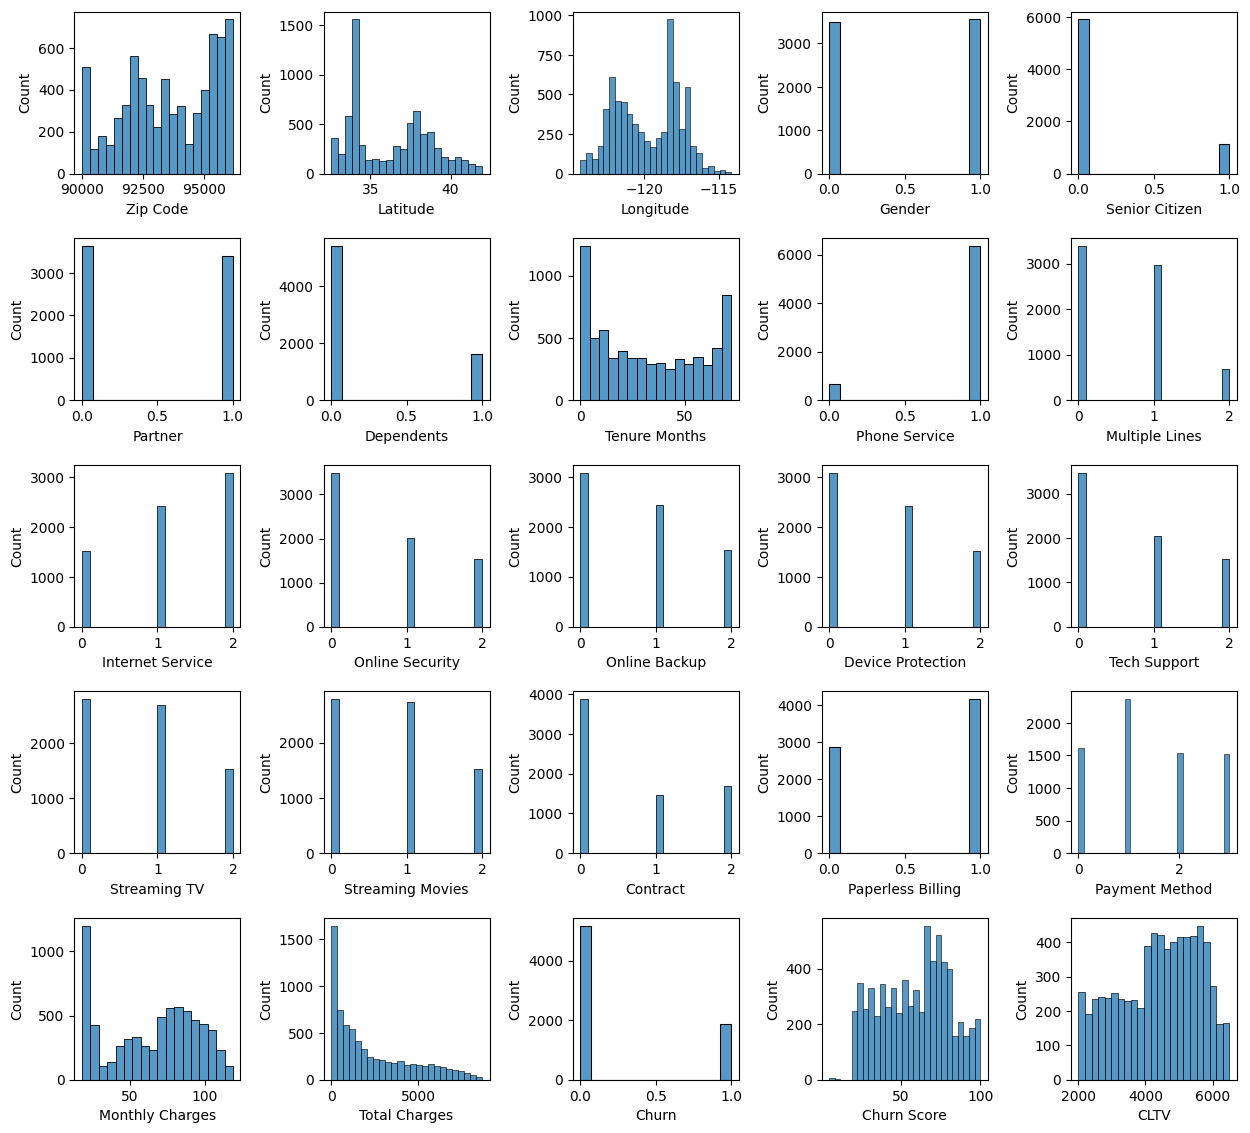

In [16]:
fig, ax = plt.subplots(5, 5, figsize=(15, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=1, wspace=0.5, hspace=0.4)
for variable, subplot in zip(df.columns, ax.flatten()):
  sns.histplot(df[variable], ax=subplot)


***--> Target Variable Analysis***

In [17]:
target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["forestgreen", "tomato"],
             title='Distribution of Churn')
fig.show()

***--> Categorical Variable Analysis***

In [18]:
#Defining bar chart function
def bar(feature, df=df ):
    #Groupby the categorical feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str
    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)

    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}',barmode="group", color_discrete_map={"0": "red", "1": "green"})

    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.1,
                y=1.15,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=1000),
    )


    return fig.show()
bar('Partner')
bar('Dependents')
bar('Phone Service')
bar('Multiple Lines')
bar('Internet Service')
bar('Online Security')
bar('Online Backup')
bar('Device Protection')
bar('Tech Support')
bar('Streaming TV')
bar('Streaming Movies')
bar('Paperless Billing')

***--> Numerical Variable Analysis***

*1*.   *HISTOGRAM*

In [19]:
# Defining the Histogram plotting function of all the numeric features to understand the distribution.
print("Histogram of all the numeric features to understand the distribution.")
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["dark blue", "orange"])
    fig.update_layout(width=800)  # Set the desired width in pixels
    fig.show()

    fig.show()

hist('Tenure Months')
hist('Monthly Charges')
hist('Total Charges')

Histogram of all the numeric features to understand the distribution.


*2*. *BOXPLOT*




<Axes: xlabel='Churn', ylabel='Monthly Charges'>

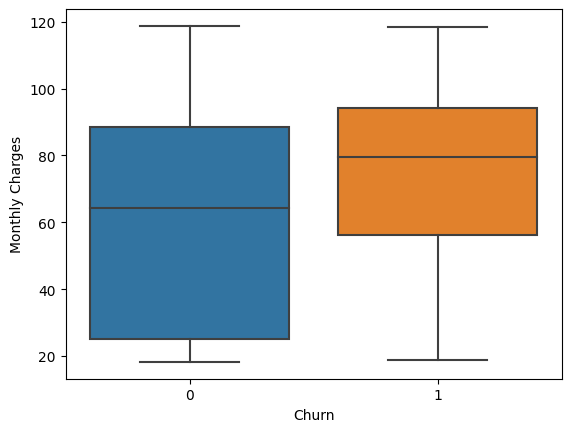

In [20]:
sns.boxplot(x='Churn', y='Monthly Charges', data=df)

<Axes: xlabel='Churn', ylabel='Tenure Months'>

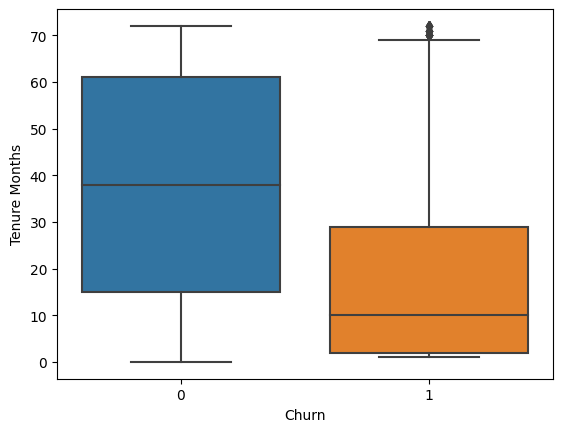

In [21]:
sns.boxplot(x='Churn', y='Tenure Months', data=df)

<Axes: xlabel='Churn', ylabel='Total Charges'>

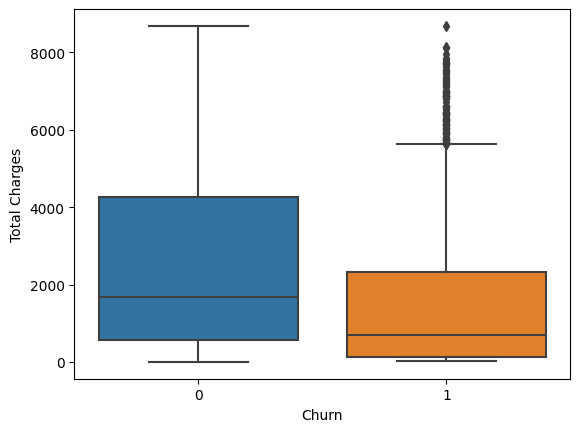

In [22]:
sns.boxplot(x='Churn', y='Total Charges', data=df)

In [23]:
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    lower_bound = q1 - (1.5 * (q3-q1))
    upper_bound = q3 + (1.5 * (q3-q1))

    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]

    return outliers

print(detect_outlier((df['Total Charges'])))
print(detect_outlier((df['Monthly Charges'])))

#There are outliers in all independent variables.

[]
[]


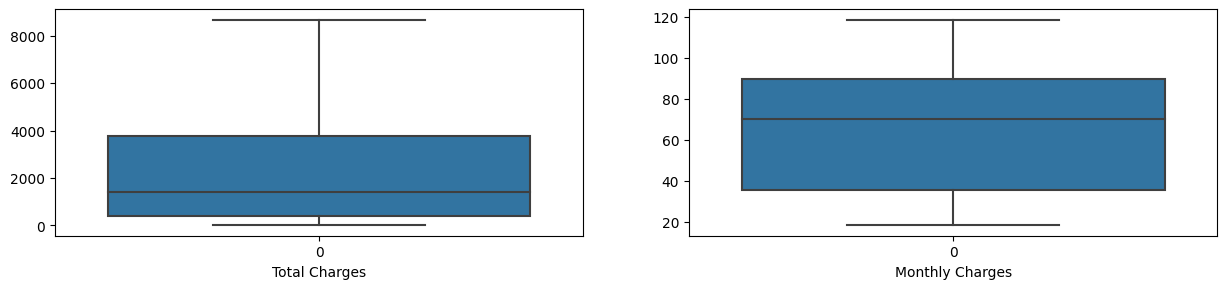

In [24]:
pno = 1
plt.figure(figsize=(15,10))
for i in ["Total Charges","Monthly Charges"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(df[i]);
            plt.xlabel(i);

*3. DATA BINNING*

In [25]:
# Create an empty DataFrame
bin_df = pd.DataFrame()

# Update the binning DataFrame
bin_df['tenure_bins'] = pd.qcut(df['Tenure Months'], q=3, labels=['low', 'medium', 'high'])
bin_df['MonthlyCharges_bins'] = pd.qcut(df['Monthly Charges'], q=3, labels=['low', 'medium', 'high'])
bin_df['TotalCharges_bins'] = pd.qcut(df['Total Charges'], q=3, labels=['low', 'medium', 'high'])
bin_df['Churn'] = df['Churn']


In [26]:
# Plot the bar chart of the binned variables
bar('tenure_bins', bin_df)
bar('MonthlyCharges_bins', bin_df)
bar('TotalCharges_bins', bin_df)


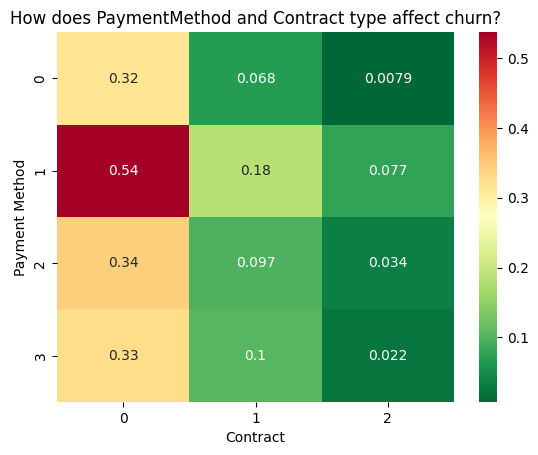

In [27]:
# How does PaymentMethod and Contract type affect churn?

result = pd.pivot_table(data=df, index='Payment Method', columns='Contract',values='Churn')

sns.heatmap(result, annot=True, cmap = 'RdYlGn_r').set_title('How does PaymentMethod and Contract type affect churn?')
plt.show()

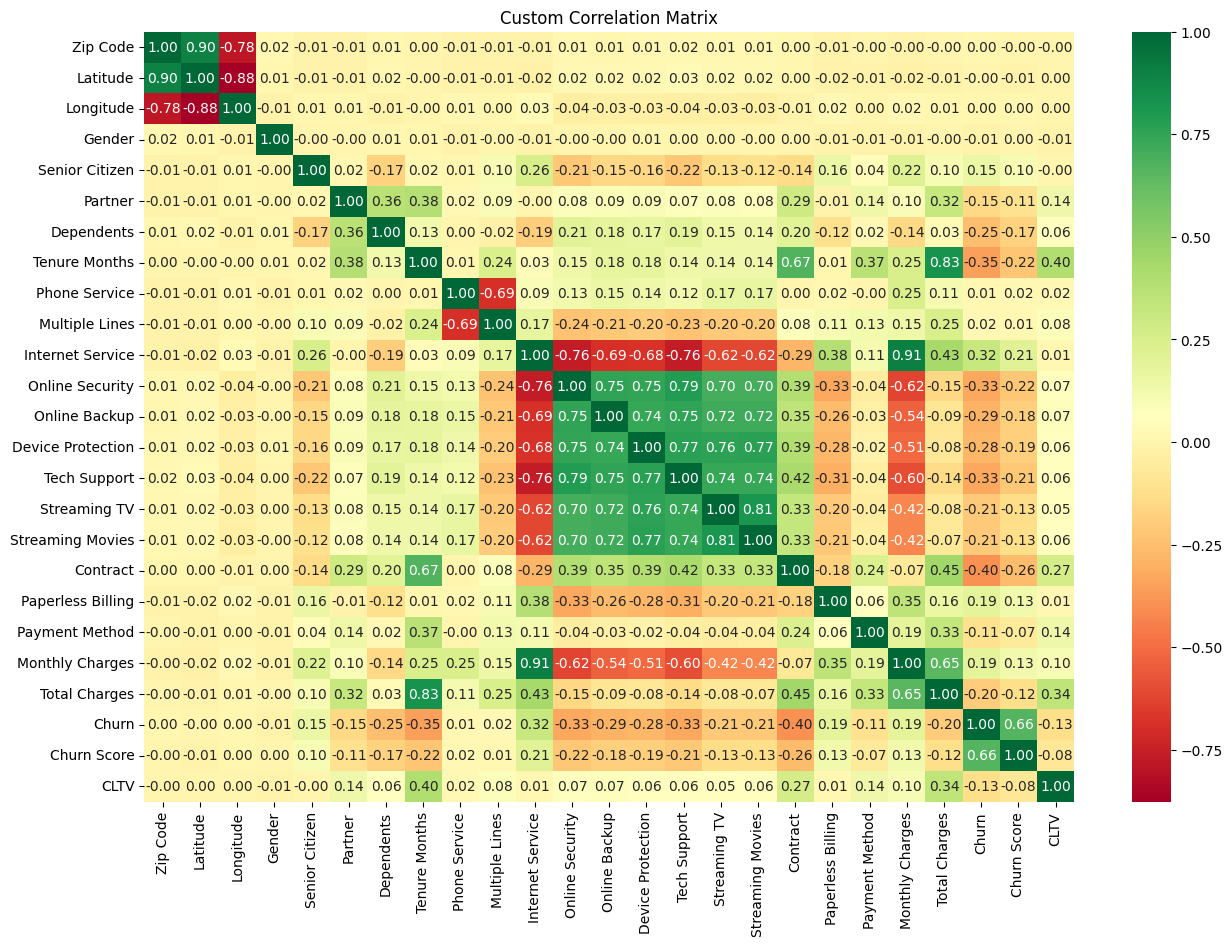

In [28]:
# Creating Correlation Matrix
correlation_matrix = df.corr()

cmap = sns.color_palette("RdYlGn", as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)

# Display the plot
plt.title("Custom Correlation Matrix")
plt.show()


# ***# Performing Principal Component Analysis (PCA)***

In [29]:
# Separate the features (X) from the target variable (y) if applicable
X = df.drop(columns=['Churn'])
y = df['Churn']

# Standardize the features (mean=0, variance=1) as PCA is sensitive to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA with the number of components you want to keep (e.g., n_components=3)
pca = PCA(n_components=10)

# Fit PCA to the standardized data
X_pca = pca.fit_transform(X_scaled)

# Transform the data to the first n principal components
X_pca = pca.transform(X_scaled)


Explained Variance Ratio for PC1: 0.2708
Explained Variance Ratio for PC2: 0.1367
Explained Variance Ratio for PC3: 0.1126
Explained Variance Ratio for PC4: 0.0751
Explained Variance Ratio for PC5: 0.0528
Explained Variance Ratio for PC6: 0.0426
Explained Variance Ratio for PC7: 0.0417
Explained Variance Ratio for PC8: 0.0365
Explained Variance Ratio for PC9: 0.0356
Explained Variance Ratio for PC10: 0.0342


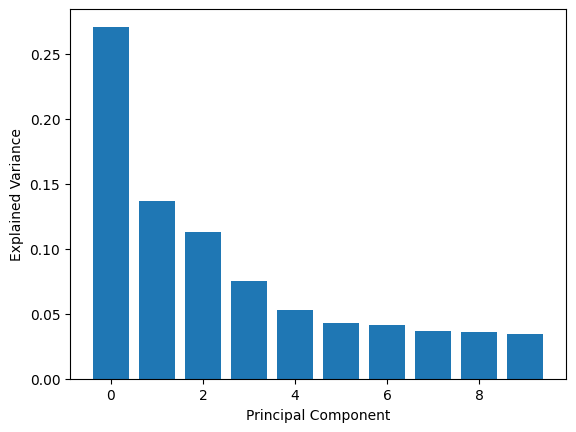

In [30]:
# Calculate the explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance ratios
for i, ratio in enumerate(explained_variance):
    print(f"Explained Variance Ratio for PC{i+1}: {ratio:.4f}")

# Plot explained variance to visualize it
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.show()

In [31]:
# Exclude the target column
loadings = pd.DataFrame(pca.components_, columns=df.columns[:-1])

# Display the loadings
print("Loadings for Principal Component 1:")
print(loadings.iloc[0, :])

print("\nLoadings for Principal Component 2:")
print(loadings.iloc[1, :])

print("\nLoadings for Principal Component 3:")
print(loadings.iloc[2, :])

Loadings for Principal Component 1:
Zip Code             0.012689
Latitude             0.018201
Longitude           -0.021282
Gender               0.002065
Senior Citizen      -0.106747
Partner              0.041336
Dependents           0.104836
Tenure Months        0.056509
Phone Service        0.046170
Multiple Lines      -0.106702
Internet Service    -0.343036
Online Security      0.350560
Online Backup        0.335867
Device Protection    0.340979
Tech Support         0.353730
Streaming TV         0.324729
Streaming Movies     0.324757
Contract             0.176287
Paperless Billing   -0.158580
Payment Method      -0.024358
Monthly Charges     -0.278896
Total Charges       -0.080038
Churn               -0.104307
Churn Score          0.026054
Name: 0, dtype: float64

Loadings for Principal Component 2:
Zip Code            -0.011389
Latitude            -0.014706
Longitude            0.012780
Gender              -0.003666
Senior Citizen       0.034314
Partner              0.280181
Dep

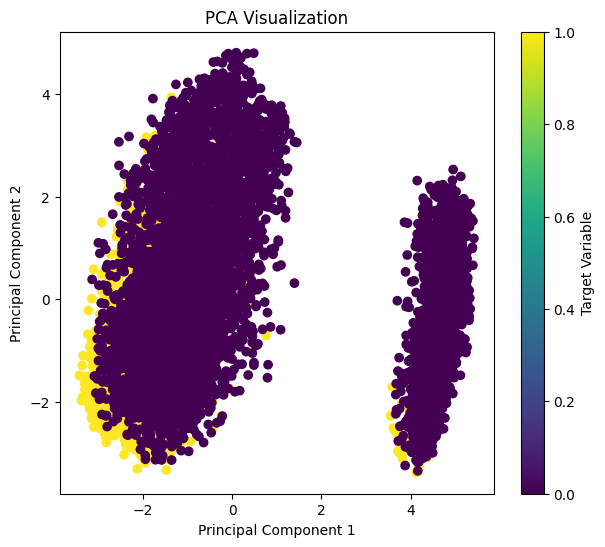

In [32]:
# Create a scatter plot of the reduced-dimension data
plt.figure(figsize=(7, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Churn'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.colorbar(label='Target Variable')

plt.show()


In [33]:
for i in range(5):
    # Creating a new feature by multiplying each original feature by its loading
    new_feature = X.mul(loadings.iloc[i, :], axis=1).sum(axis=1)

    # Adding the new feature to the DataFrame
    X[f'PC{i+1}_feature'] = new_feature

In [34]:
#Showing new variables added to the dataframe
X.head()

,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Payment Method,Monthly Charges,Total Charges,Churn Score,CLTV,PC1_feature,PC2_feature,PC3_feature,PC4_feature,PC5_feature
0,90003,33.964131,-118.272783,1,0,0,0,2,1,0,...,0,53.85,108.15,86,3239,1124.125437,-935.464494,51551.355572,-1419.819039,197.168278
1,90005,34.059281,-118.307420,0,0,0,1,2,1,0,...,1,70.70,151.65,67,2701,1114.526153,-914.225316,51553.403764,-1429.158677,195.162652
2,90006,34.048013,-118.293953,0,0,0,1,8,1,1,...,1,99.65,820.50,86,5372,1054.648432,-567.147578,51564.247878,-1507.953568,139.106628
3,90010,34.062125,-118.315709,0,0,1,1,28,1,1,...,1,104.80,3046.05,84,5003,876.607124,546.370832,51599.195996,-1745.670260,-36.743106
4,90015,34.039224,-118.266293,1,0,0,1,49,1,1,...,2,103.70,5036.30,89,5340,718.914791,1543.796013,51631.205065,-1956.654979,-195.215443


#***# Spliting The Dataset***

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=102)

# ***# Training The Model***

In [36]:

# Step 2: Apply Ensemble Technique (Random Forest) to the Reduced Feature Space
# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=102)

# Training the classifier on the reduced feature space
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)


# Train an AdaBoost Classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=102)
ada_classifier.fit(X_train, y_train)

# Predict using the AdaBoost Classifier
y_pred_ada = ada_classifier.predict(X_test)


# Train an XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=102)
xgb_classifier.fit(X_train, y_train)

# Predict using the XGBoost Classifier
y_pred_xgb = xgb_classifier.predict(X_test)


# ***# Accuracy Of Models***

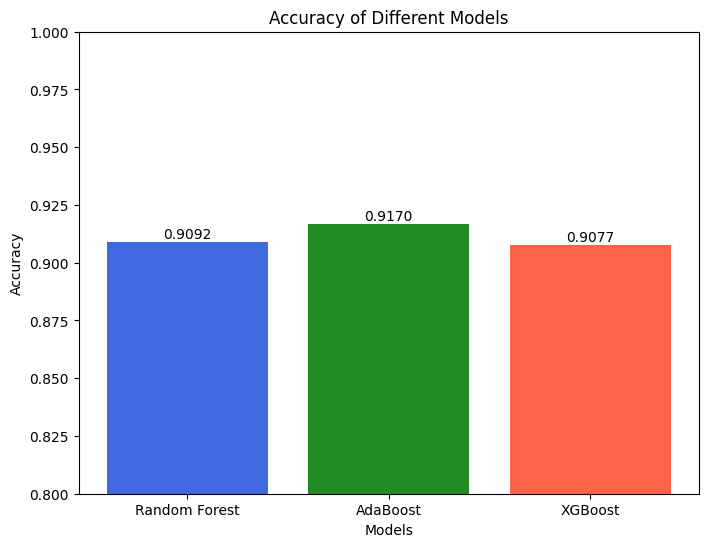

In [37]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_ada= accuracy_score(y_test, y_pred_ada)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

accuracies = [accuracy_rf,accuracy_ada, accuracy_xgb]  # Random Forest, AdaBoost, and XGBoost accuracies
models = ['Random Forest', 'AdaBoost', 'XGBoost']


plt.figure(figsize=(8, 6))
bars = plt.bar(models, accuracies, color=['royalblue', 'forestgreen', 'tomato']
               )
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Set the y-axis limits
plt.ylim(0.8, 1.0)

# Display the accuracy values on the bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, acc, f'{acc:.4f}', ha='center', va='bottom')

plt.show()

# ***# Confusion Matrix Of Models***

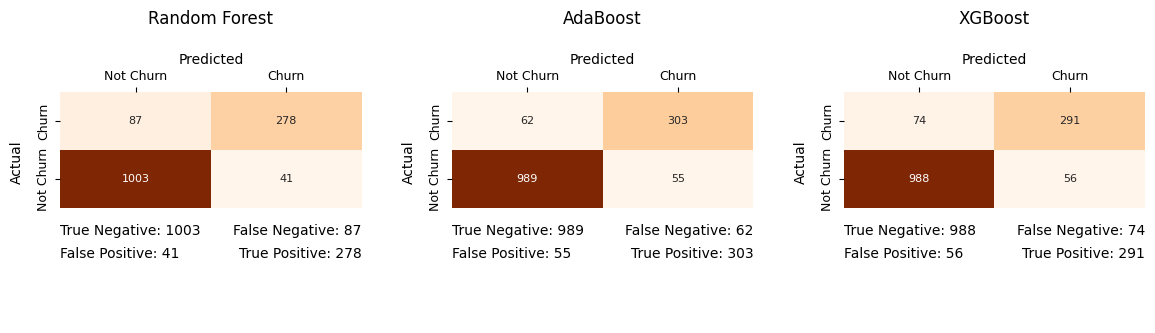

In [38]:
classifiers = {
    "Random Forest": y_pred_rf,
    "AdaBoost": y_pred_ada,
    "XGBoost": y_pred_xgb,
}

confusion_matrices = {}

for classifier_name, y_pred in classifiers.items():
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[classifier_name] = cm

fig, axes = plt.subplots(1, 3, figsize=(14, 3))

def add_values_to_confusion_matrix(confusion_matrix, ax, classifier_name):
    heatmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=ax, annot_kws={"size": 8})  # Decreased annotation font size
    ax.set_xlabel("Predicted", fontsize=10)  # Added space before classifier name
    ax.set_ylabel("Actual", fontsize=10,labelpad=15)
    ax.xaxis.set_ticks_position('top')  # Move x-axis ticks to the top
    ax.xaxis.set_label_position('top')  # Move x-axis label to the top

    ax.set_xticklabels(["Not Churn", "Churn"], fontsize=9)
    ax.set_yticklabels(["Not Churn", "Churn"], fontsize=9)
    ax.set_title("Confusion Matrix")

    heatmap.set_ylim(-2, 2)

    tn, fp, fn, tp = confusion_matrix.ravel()
    ax.text(0, 0.4, f"True Negative: {tn}", ha='left', va='center', transform=ax.transAxes)
    ax.text(0, 0.3, f"False Positive: {fp}", ha='left', va='center', transform=ax.transAxes)
    ax.text(1, 0.4, f"False Negative: {fn}", ha='right', va='center', transform=ax.transAxes)
    ax.text(1, 0.3, f"True Positive: {tp}", ha='right', va='center', transform=ax.transAxes)

    ax.yaxis.set_label_coords(-0.12, 0.7)

for i, (classifier_name, cm) in enumerate(confusion_matrices.items()):
    add_values_to_confusion_matrix(cm, axes[i], classifier_name)
    axes[i].set_title(f"{classifier_name}\n")

plt.subplots_adjust(wspace=0.3)

plt.show()

# ***# Classification Report Of Models***

             Random Forest  AdaBoost   XGBoost
Precision 0       0.871473  0.846369  0.838617
Recall    0       0.761644  0.830137  0.797260
F1 Score  0       0.812865  0.838174  0.817416


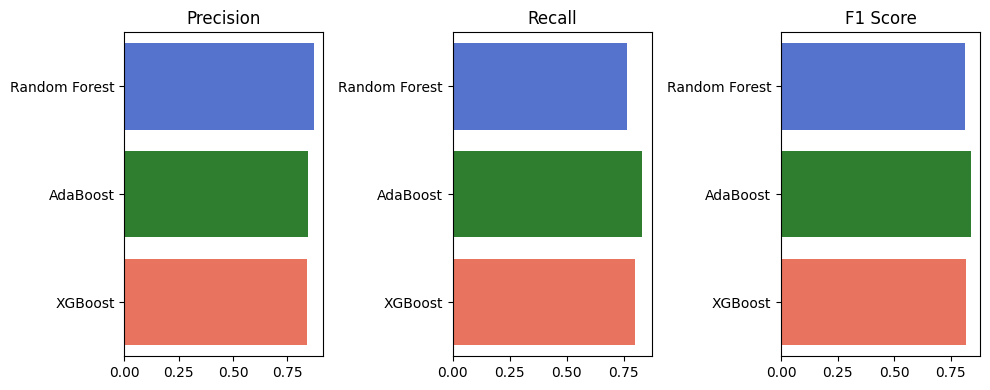

In [39]:
classifiers = {
    "Random Forest": y_pred_rf,
    "AdaBoost": y_pred_ada,
    "XGBoost": y_pred_xgb,
}


classification_reports = {}


for classifier_name, y_pred in classifiers.items():
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[classifier_name] = report

precision_df = pd.DataFrame({classifier: [report["1"]["precision"]] for classifier, report in classification_reports.items()})
recall_df = pd.DataFrame({classifier: [report["1"]["recall"]] for classifier, report in classification_reports.items()})
f1_score_df = pd.DataFrame({classifier: [report["1"]["f1-score"]] for classifier, report in classification_reports.items()})

metric_table = pd.concat([precision_df, recall_df, f1_score_df], keys=['Precision', 'Recall', 'F1 Score'])
print(metric_table)

# Set custom colors for the bar plots
colors = ['royalblue', 'forestgreen', 'tomato']

# Set figure size
plt.figure(figsize=(10, 4))

# Create subplots for precision, recall, and f1-score with custom colors
plt.subplot(131)
sns.barplot(data=precision_df, orient="h", palette=colors)
plt.title("Precision")

plt.subplot(132)
sns.barplot(data=recall_df, orient="h", palette=colors)
plt.title("Recall")

plt.subplot(133)
sns.barplot(data=f1_score_df, orient="h", palette=colors)
plt.title("F1 Score")

plt.tight_layout()
plt.show()


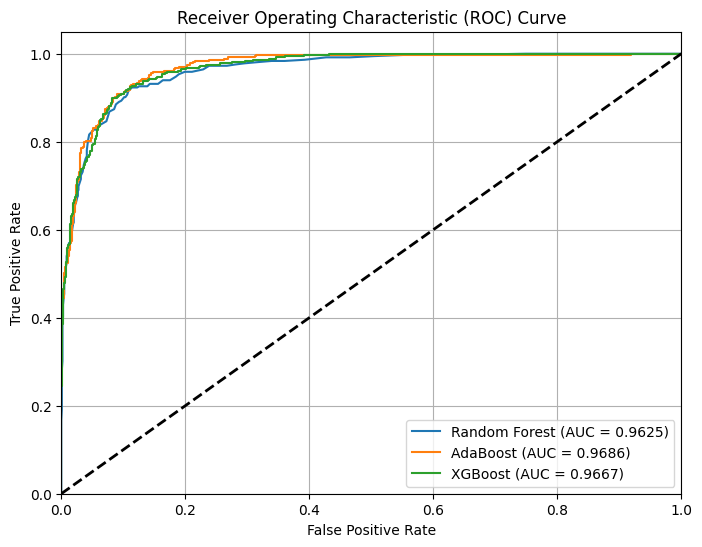

In [40]:
classifiers = {
    "Random Forest": rf_classifier,
    "AdaBoost": ada_classifier,
    "XGBoost": xgb_classifier
}

roc_curves = {}
auc_scores = {}

for classifier_name, classifier in classifiers.items():
    y_scores = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_curves[classifier_name] = (fpr, tpr)
    auc = roc_auc_score(y_test, y_scores)
    auc_scores[classifier_name] = auc

plt.figure(figsize=(8, 6))
for classifier_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{classifier_name} (AUC = {auc_scores[classifier_name]:.4f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# ***# BAYESIAN OPTIMIZATION***

In [41]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

# Load your dataset and split it into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the objective function for hyperparameter tuning
def objective(params, model, X_train, y_train, X_val, y_val):
    if model == 'rf':
        clf = RandomForestClassifier(n_estimators=int(params['n_estimators']), max_depth=int(params['max_depth']), random_state=42)
    elif model == 'ada':
        clf = AdaBoostClassifier(n_estimators=int(params['n_estimators']), learning_rate=params['learning_rate'], random_state=42)
    elif model == 'xgb':
        clf = XGBClassifier(n_estimators=int(params['n_estimators']), learning_rate=params['learning_rate'], max_depth=int(params['max_depth']), random_state=42)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    return {'loss': 1 - accuracy, 'status': STATUS_OK}

# Define the search space for each model
space_rf = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
    'max_depth': hp.quniform('max_depth', 5, 30, 5)
}

space_ada = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'learning_rate': hp.uniform('learning_rate', 0.001, 1.0)
}

space_xgb = {
    'n_estimators': hp.quniform('n_estimators', 50, 200, 10),
    'learning_rate': hp.uniform('learning_rate', 0.001, 1.0),
    'max_depth': hp.quniform('max_depth', 3, 10, 1)
}

# Initialize the Trials object to keep track of the results
trials_rf = Trials()
trials_ada = Trials()
trials_xgb = Trials()

# Run Bayesian optimization for each model
best_rf = fmin(fn=lambda params: objective(params, 'rf', X_train, y_train, X_val, y_val),
               space=space_rf,
               algo=tpe.suggest,
               max_evals=50,  # Number of iterations
               trials=trials_rf)

best_ada = fmin(fn=lambda params: objective(params, 'ada', X_train, y_train, X_val, y_val),
                space=space_ada,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials_ada)

best_xgb = fmin(fn=lambda params: objective(params, 'xgb', X_train, y_train, X_val, y_val),
                space=space_xgb,
                algo=tpe.suggest,
                max_evals=50,
                trials=trials_xgb)

# Print the best hyperparameters for each model
print("Best Hyperparameters for Random Forest:")
print(best_rf)

print("Best Hyperparameters for AdaBoost:")
print(best_ada)

print("Best Hyperparameters for XGBoost:")
print(best_xgb)


100%|██████████| 50/50 [00:22<00:00,  2.18trial/s, best loss: 0.08516678495386798]
Best Hyperparameters for Random Forest:
{'max_depth': 10.0, 'n_estimators': 1000.0}
Best Hyperparameters for AdaBoost:
{'learning_rate': 0.42043224713194083, 'n_estimators': 130.0}
Best Hyperparameters for XGBoost:
{'learning_rate': 0.2273333906685468, 'max_depth': 10.0, 'n_estimators': 170.0}


# ***# Training With Best Params***

In [42]:
# Define the best hyperparameters obtained from Bayesian optimization
best_hyperparams_rf = {
    'n_estimators': int(best_rf['n_estimators']),
    'max_depth': int(best_rf['max_depth'])
}

best_hyperparams_ada = {
    'n_estimators': int(best_ada['n_estimators']),
    'learning_rate': best_ada['learning_rate']
}

best_hyperparams_xgb = {
    'n_estimators': int(best_xgb['n_estimators']),
    'learning_rate': best_xgb['learning_rate'],
    'max_depth': int(best_xgb['max_depth'])
}

# Creating new instances of the classifiers with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_hyperparams_rf)
best_ada_model = AdaBoostClassifier(random_state=42, **best_hyperparams_ada)
best_xgb_model = XGBClassifier(random_state=42, **best_hyperparams_xgb)

# Training the models on training data with the best parameters
best_rf_model.fit(X_train, y_train)
best_ada_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2273333906685468,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=170, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

# ***# Accuracy Visualization After Tuning***

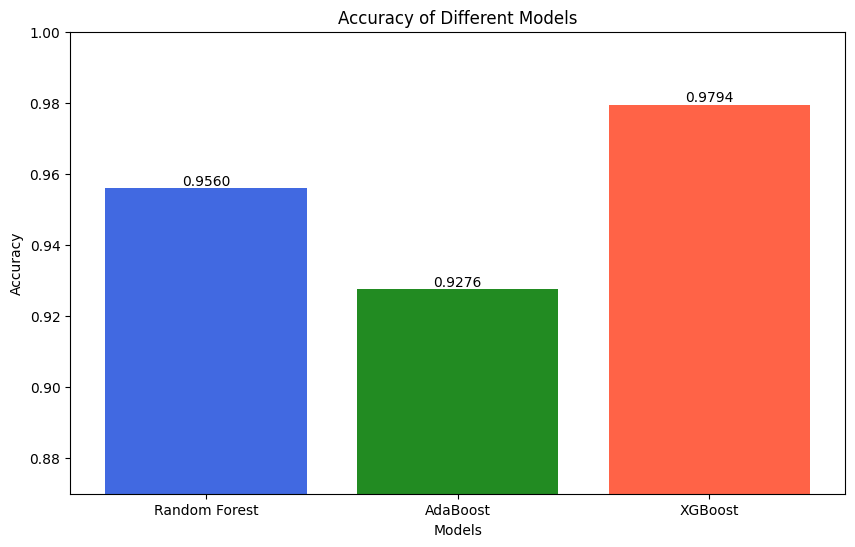

In [43]:
from sklearn.metrics import accuracy_score

# Predict using the trained Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Predict using the trained AdaBoost model
y_pred_ada = best_ada_model.predict(X_test)

# Evaluate the AdaBoost model accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)

# Predict using the trained XGBoost model
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the XGBoost model accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

models = ['Random Forest', 'AdaBoost', 'XGBoost']
accuracies = [accuracy_rf, accuracy_ada, accuracy_xgb]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['royalblue', 'forestgreen', 'tomato'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')

# Add accuracy values on top of the bars
for model, accuracy in zip(models, accuracies):
    plt.text(model, accuracy, f'{accuracy:.4f}', ha='center', va='bottom')

plt.ylim(0.87, 1.0)

plt.show()

In [44]:
%config InlineBackend.figure_format = 'svg'

classifiers = {
    "Random Forest": best_rf_model,
    "AdaBoost": best_ada_model,
    "XGBoost": best_xgb_model,
}

confusion_matrices = {}
confusion_values = {}

for classifier_name, model in classifiers.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[classifier_name] = cm
    tn, fp, fn, tp = cm.ravel()
    confusion_values[classifier_name] = {
        'True Negative (TN)': tn,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Positive (TP)': tp
    }

fig, axes = plt.subplots(1, 3, figsize=(12, 3))

def add_values_to_confusion_matrix(confusion_matrix, ax, values):
    heatmap = sns.heatmap(confusion_matrix, annot=True, cmap="Oranges", fmt="d", cbar=False, ax=ax)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title(f"{classifier_name} ")

    for label, value in values.items():
        ax.text(value, -0.5, f"{label}: {value}", ha='center', va='center', fontsize=10, color='black')

    tn, fp, fn, tp = confusion_matrix.ravel()
    ax.text(0, -0.4, f"True Negative: {tn}", ha='left', va='center', transform=ax.transAxes,fontsize=9)
    ax.text(0, -0.3, f"False Positive: {fp}", ha='left', va='center', transform=ax.transAxes,fontsize=9)
    ax.text(1, -0.4, f"False Negative: {fn}", ha='right', va='center', transform=ax.transAxes,fontsize=9)
    ax.text(1, -0.3, f"True Positive: {tp}", ha='right', va='center', transform=ax.transAxes,fontsize=9)

for i, (classifier_name, cm) in enumerate(confusion_matrices.items()):
    values = confusion_values[classifier_name]
    add_values_to_confusion_matrix(cm, axes[i], values)

plt.subplots_adjust(wspace=0.4)

plt.show()



# ***# Classification Report Visualization After Tuning***

             Random Forest (Best)  AdaBoost (Best)  XGBoost (Best)
Precision 0              0.931624         0.872521        0.964088
Recall    0              0.895890         0.843836        0.956164
F1 Score  0              0.913408         0.857939        0.960110


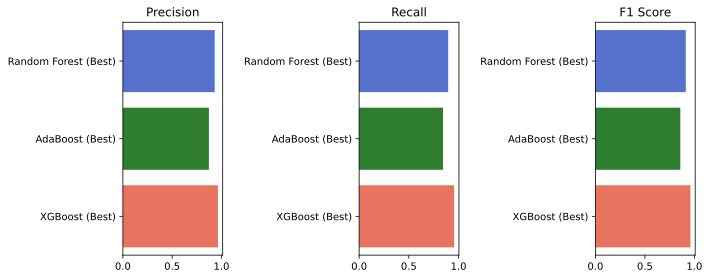

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

# Define the classifiers with the best hyperparameters
best_classifiers = {
    "Random Forest (Best)": best_rf_model,
    "AdaBoost (Best)": best_ada_model,
    "XGBoost (Best)": best_xgb_model,
}

# Initialize an empty dictionary to store classification reports
best_classification_reports = {}

# Generate classification reports for each classifier
for classifier_name, classifier in best_classifiers.items():
    y_pred_best = classifier.predict(X_test)
    report = classification_report(y_test, y_pred_best, output_dict=True)
    best_classification_reports[classifier_name] = report

# Create DataFrames to store precision, recall, and f1-score
precision_df = pd.DataFrame({classifier: [report["1"]["precision"]] for classifier, report in best_classification_reports.items()})
recall_df = pd.DataFrame({classifier: [report["1"]["recall"]] for classifier, report in best_classification_reports.items()})
f1_score_df = pd.DataFrame({classifier: [report["1"]["f1-score"]] for classifier, report in best_classification_reports.items()})

# Display metric values in a tabular form
metric_table = pd.concat([precision_df, recall_df, f1_score_df], keys=['Precision', 'Recall', 'F1 Score'])
print(metric_table)

# Set custom colors for the bar plots
colors = ['royalblue', 'forestgreen', 'tomato']

# Set figure size
plt.figure(figsize=(10, 4))

# Create subplots for precision, recall, and f1-score with custom colors
plt.subplot(131)
sns.barplot(data=precision_df, orient="h", palette=colors)
plt.title("Precision")

plt.subplot(132)
sns.barplot(data=recall_df, orient="h", palette=colors)
plt.title("Recall")

plt.subplot(133)
sns.barplot(data=f1_score_df, orient="h", palette=colors)
plt.title("F1 Score")

plt.tight_layout()
plt.show()



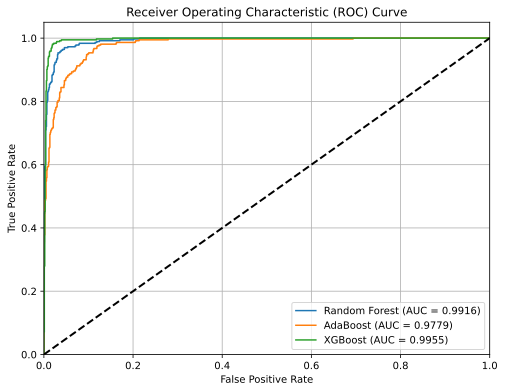

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = {
    "Random Forest": best_rf_model,
    "AdaBoost": best_ada_model,
    "XGBoost": best_xgb_model
}

# Create a dictionary to store ROC curves and AUC scores
roc_curves = {}
auc_scores = {}

# Calculate ROC curves and AUC scores for each classifier
for classifier_name, classifier in classifiers.items():
    y_scores = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_curves[classifier_name] = (fpr, tpr)
    auc = roc_auc_score(y_test, y_scores)
    auc_scores[classifier_name] = auc

# Plot ROC curves
plt.figure(figsize=(8, 6))
for classifier_name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{classifier_name} (AUC = {auc_scores[classifier_name]:.4f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Plot the diagonal for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


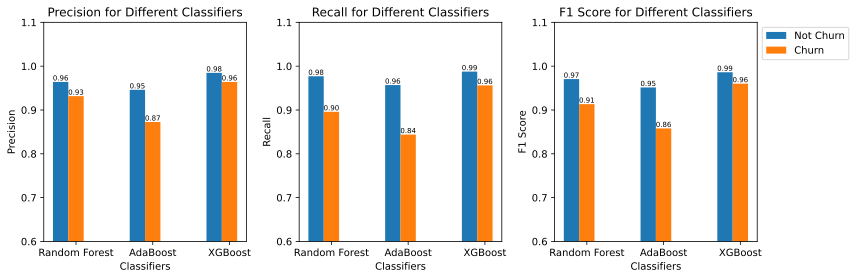

In [47]:
# Define the classifiers, their names, and the labels
classifiers = {
    "Random Forest": best_rf_model,
    "AdaBoost": best_ada_model,
    "XGBoost": best_xgb_model,
}

class_names = ['Not Churn', 'Churn']
# Initialize dictionaries to store metric values for each classifier
precision = {}
recall = {}
f1_score = {}

# Calculate metrics for each classifier
for classifier_name, classifier in classifiers.items():
    y_pred = classifier.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

    # Store the metric values
    precision[classifier_name] = [report[label]['precision'] for label in class_names]
    recall[classifier_name] = [report[label]['recall'] for label in class_names]
    f1_score[classifier_name] = [report[label]['f1-score'] for label in class_names]

# Create a bar chart for each metric
plt.figure(figsize=(12, 4))
positions = range(len(classifiers))
bar_width = 0.2

for i, (metric_dict, metric_name) in enumerate(zip([precision, recall, f1_score], ['Precision', 'Recall', 'F1 Score'])):
    plt.subplot(1, 3, i+1)
    for j, label in enumerate(class_names):
        values = [metric_dict[classifier][j] for classifier in classifiers]
        bars = plt.bar([p + j * bar_width for p in positions], values, bar_width, label=label)

        # Add annotations outside of the bars
        for bar, value in zip(bars, values):
            plt.text(bar.get_x() + bar.get_width() / 2, value, f'{value:.2f}', ha='center', va='bottom', fontsize=7)

    plt.title(f"{metric_name} for Different Classifiers")
    plt.xlabel("Classifiers")
    plt.ylabel(metric_name)
    plt.xticks([p + (bar_width * len(class_names) / 2) for p in positions], classifiers.keys())
    plt.ylim(0.6, 1.1)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Box Plot after Treating Outliers